In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
sns.set_style('darkgrid')
from imblearn.pipeline import Pipeline
from dataprep.eda import plot, plot_correlation, plot_missing, create_report
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [2]:
df = pd.read_csv("gas_turbines.csv")
df

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY  \
0       6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70   
1       6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72   
2       6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71   
3       7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72   
4       7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72   
...        ...     ...     ...     ...     ...     ...     ...     ...   
14020  16.1900  1025.5  63.856  3.1972  18.875  1054.8  549.87  109.20   
14021  15.8350  1025.5  63.397  3.7645  23.057  1080.4  550.16  128.14   
14022  14.6840  1025.5  68.801  4.1049  25.665  1096.5  550.04  140.91   
14023  13.5020  1025.6  72.476  3.8622  24.095  1087.4  550.30  134.40   
14024  12.1940  1025.4  76.860  3.8681  24.060  1087.0  550.06  134.67   

          CDP      CO     NOX  
0      10.605  3.1547  82.722  
1      10.598  3.2363  82.776  
2      10.601  3.2012  82.468  
3      10.606  3.1923  82.670  
4      10.612  3.2484  82.311  
...       ...     ...     ...  
14020  10.540  3.6947  75.209  
14021  11.693  2.3615  75.847  
14022  12.295  1.0665  80.408  
14023  11.949  1.2706  76.284  
14024     NaN     NaN     NaN  

[14025 rows x 11 columns]

# EDA

In [3]:
df.isnull().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP      True
CO       True
NOX      True
dtype: bool

In [4]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     1
CO      1
NOX     1
dtype: int64

In [5]:
d = df[df["CDP"].isnull()].index
d

Int64Index([14024], dtype='int64')

In [6]:
dd = df[df["CO"].isnull()].index
dd

Int64Index([14024], dtype='int64')

In [7]:
df = df.drop(d,axis=0)

In [8]:
# as there is only one column has null value so we remove it

In [9]:
df.reset_index()

index       AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY  \
0          0   6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70   
1          1   6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72   
2          2   6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71   
3          3   7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72   
4          4   7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72   
...      ...      ...     ...     ...     ...     ...     ...     ...     ...   
14019  14019  15.9870  1025.8  65.044  3.2258  18.964  1055.4  549.87  109.60   
14020  14020  16.1900  1025.5  63.856  3.1972  18.875  1054.8  549.87  109.20   
14021  14021  15.8350  1025.5  63.397  3.7645  23.057  1080.4  550.16  128.14   
14022  14022  14.6840  1025.5  68.801  4.1049  25.665  1096.5  550.04  140.91   
14023  14023  13.5020  1025.6  72.476  3.8622  24.095  1087.4  550.30  134.40   

          CDP      CO     NOX  
0      10.605  3.1547  82.722  
1      10.598  3.2363  82.776  
2      10.601  3.2012  82.468  
3      10.606  3.1923  82.670  
4      10.612  3.2484  82.311  
...       ...     ...     ...  
14019  10.586  3.2840  74.661  
14020  10.540  3.6947  75.209  
14021  11.693  2.3615  75.847  
14022  12.295  1.0665  80.408  
14023  11.949  1.2706  76.284  

[14024 rows x 12 columns]

In [10]:
df

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY  \
0       6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70   
1       6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72   
2       6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71   
3       7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72   
4       7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72   
...        ...     ...     ...     ...     ...     ...     ...     ...   
14019  15.9870  1025.8  65.044  3.2258  18.964  1055.4  549.87  109.60   
14020  16.1900  1025.5  63.856  3.1972  18.875  1054.8  549.87  109.20   
14021  15.8350  1025.5  63.397  3.7645  23.057  1080.4  550.16  128.14   
14022  14.6840  1025.5  68.801  4.1049  25.665  1096.5  550.04  140.91   
14023  13.5020  1025.6  72.476  3.8622  24.095  1087.4  550.30  134.40   

          CDP      CO     NOX  
0      10.605  3.1547  82.722  
1      10.598  3.2363  82.776  
2      10.601  3.2012  82.468  
3      10.606  3.1923  82.670  
4      10.612  3.2484  82.311  
...       ...     ...     ...  
14019  10.586  3.2840  74.661  
14020  10.540  3.6947  75.209  
14021  11.693  2.3615  75.847  
14022  12.295  1.0665  80.408  
14023  11.949  1.2706  76.284  

[14024 rows x 11 columns]

In [11]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [12]:
#Checking the data types
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [13]:
#Unique values for every feature
df.nunique()

AT      11391
AP        508
AH      11952
AFDP    10742
GTEP     7931
TIT       687
TAT      2279
TEY      4045
CDP      3545
CO      12360
NOX     11296
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14024 entries, 0 to 14023
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      14024 non-null  float64
 1   AP      14024 non-null  float64
 2   AH      14024 non-null  float64
 3   AFDP    14024 non-null  float64
 4   GTEP    14024 non-null  float64
 5   TIT     14024 non-null  float64
 6   TAT     14024 non-null  float64
 7   TEY     14024 non-null  float64
 8   CDP     14024 non-null  float64
 9   CO      14024 non-null  float64
 10  NOX     14024 non-null  float64
dtypes: float64(11)
memory usage: 1.2 MB


In [15]:
df.describe().T

count         mean        std          min          25%         50%  \
AT    14024.0    18.236190   7.568688     0.522300    12.052250    18.95950   
AP    14024.0  1012.813982   6.142774   985.850000  1008.800000  1012.60000   
AH    14024.0    78.810582  13.981224    30.344000    69.080500    82.08700   
AFDP  14024.0     4.204706   0.771718     2.087400     3.721275     4.20255   
GTEP  14024.0    25.487714   4.160264    17.878000    23.364000    25.22200   
TIT   14024.0  1084.121028  16.345393  1009.500000  1080.575000  1089.20000   
TAT   14024.0   545.452287   7.789176   513.060000   542.217500   549.89000   
TEY   14024.0   134.247286  15.825868   100.830000   128.465000   133.79000   
CDP   14024.0    12.113789   1.100822     9.904400    11.655750    12.04900   
CO    14024.0     1.928853   2.146188     0.000388     0.832008     1.36165   
NOX   14024.0    67.490273  10.077909    27.765000    60.831000    66.01000   

              75%        max  
AT      24.259250    34.9290  
AP    1016.400000  1031.8000  
AH      89.907250   100.2000  
AFDP     4.559525     7.6106  
GTEP    27.507000    37.4020  
TIT   1096.600000  1100.8000  
TAT    550.060000   550.6100  
TEY    142.025000   174.6100  
CDP     12.672250    15.0810  
CO       2.139750    44.1030  
NOX     72.596250   119.8900

The features are not on the same scale. For example AP has a mean of 1013.19 and CO has a mean value of 1.97. Features should be on the same scale for algorithms such as (gradient descent) to converge smoothly.
as gradient descent is used in neural network

In [16]:
corr = df[df.columns].corr()

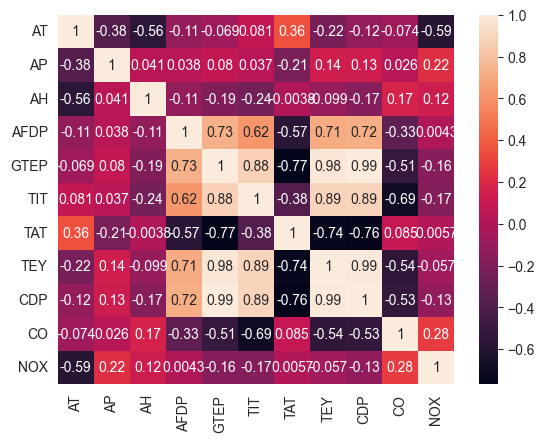

In [17]:
sns.heatmap(corr,annot=True)
plt.show()

In [18]:
# TIT ,CDP,GTEP ,AFDP has very high positive corelation
# 
# CDP,TAT,GTEP has high corelation

In [19]:
 df.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988680
GTEP    0.977765
TIT     0.893094
AFDP    0.707776
AP      0.142635
NOX    -0.057220
AH     -0.098984
AT     -0.224464
CO     -0.544519
TAT    -0.735569
Name: TEY, dtype: float64

# DATA visualization


In [20]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

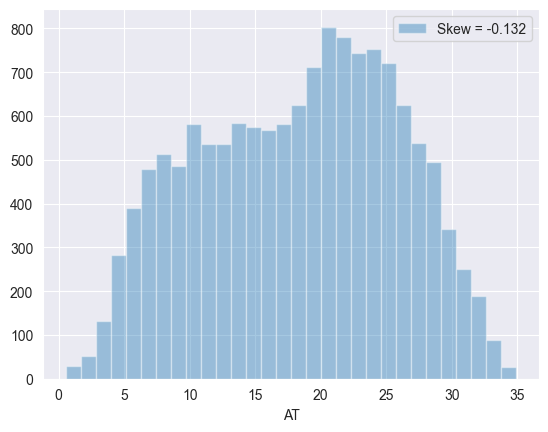

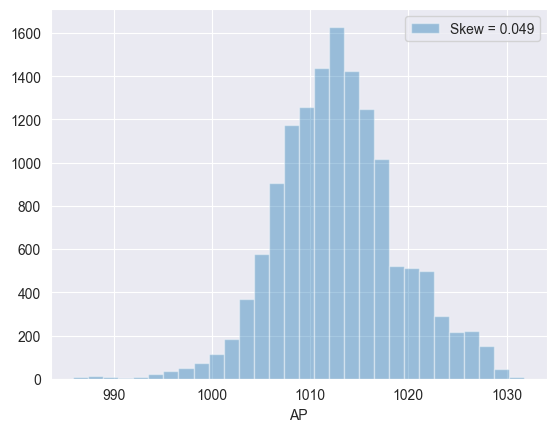

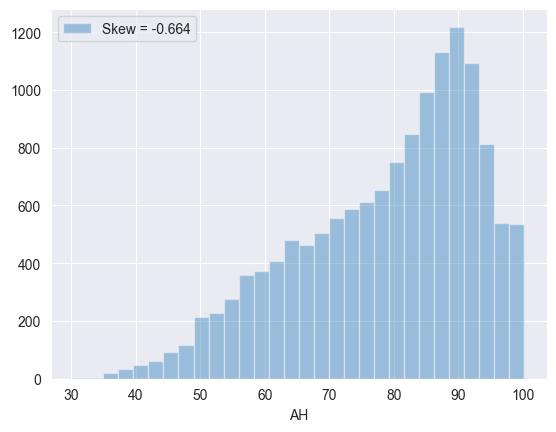

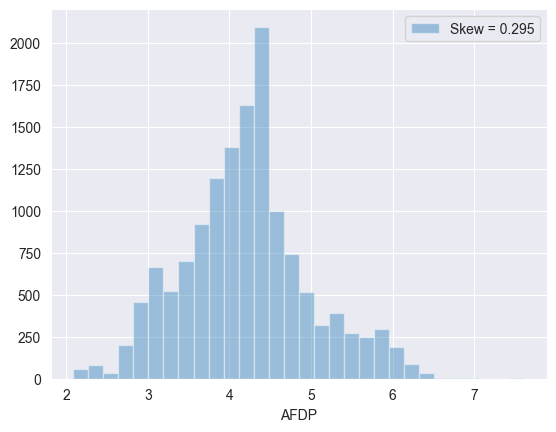

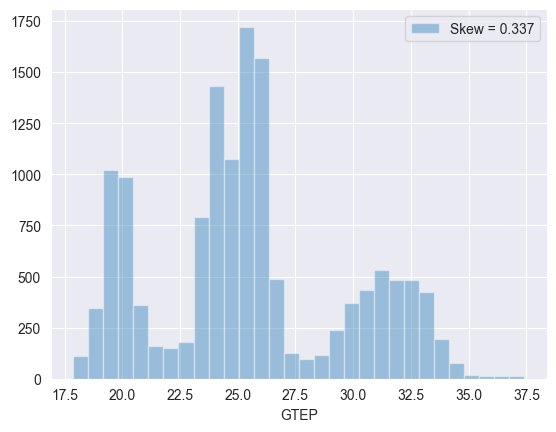

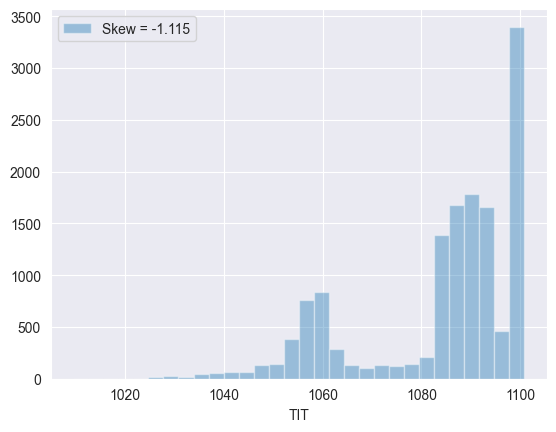

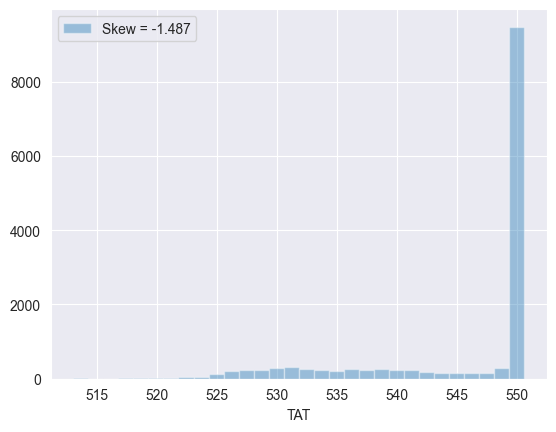

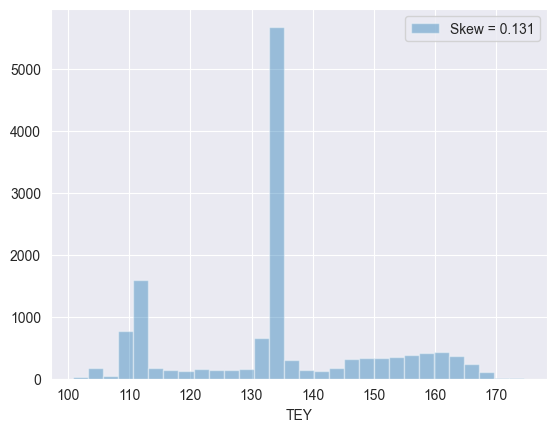

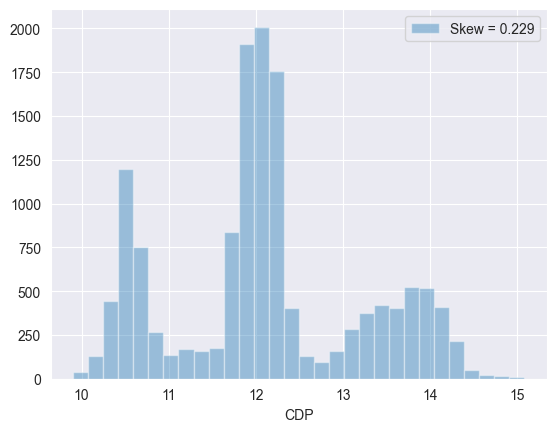

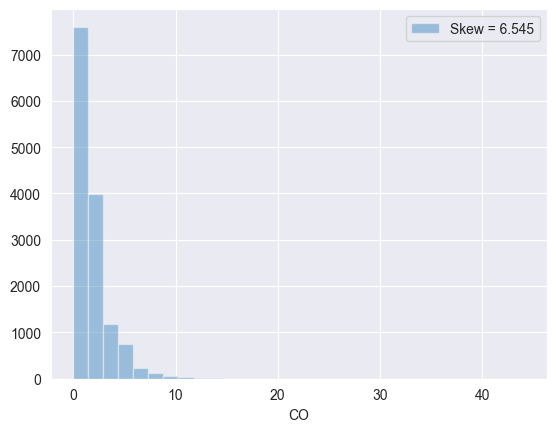

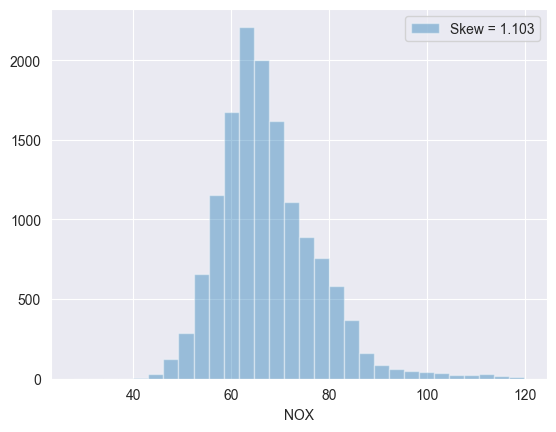

In [21]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for i in numerical_features:
    skew = df[i].skew()
    sns.distplot(df[i], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [22]:
# Some of the features are normally distributed. The features AH, CO, TITy and TATa exhibit the 
# highest skew coefficients. Moreover, the distribution of Carbon Mono oxide (CO) and Turbine 
# inlet temperature (TIT) and Turbine after temperature (TAT)seem to contain many outliers.

In [23]:
import matplotlib.pyplot as plt

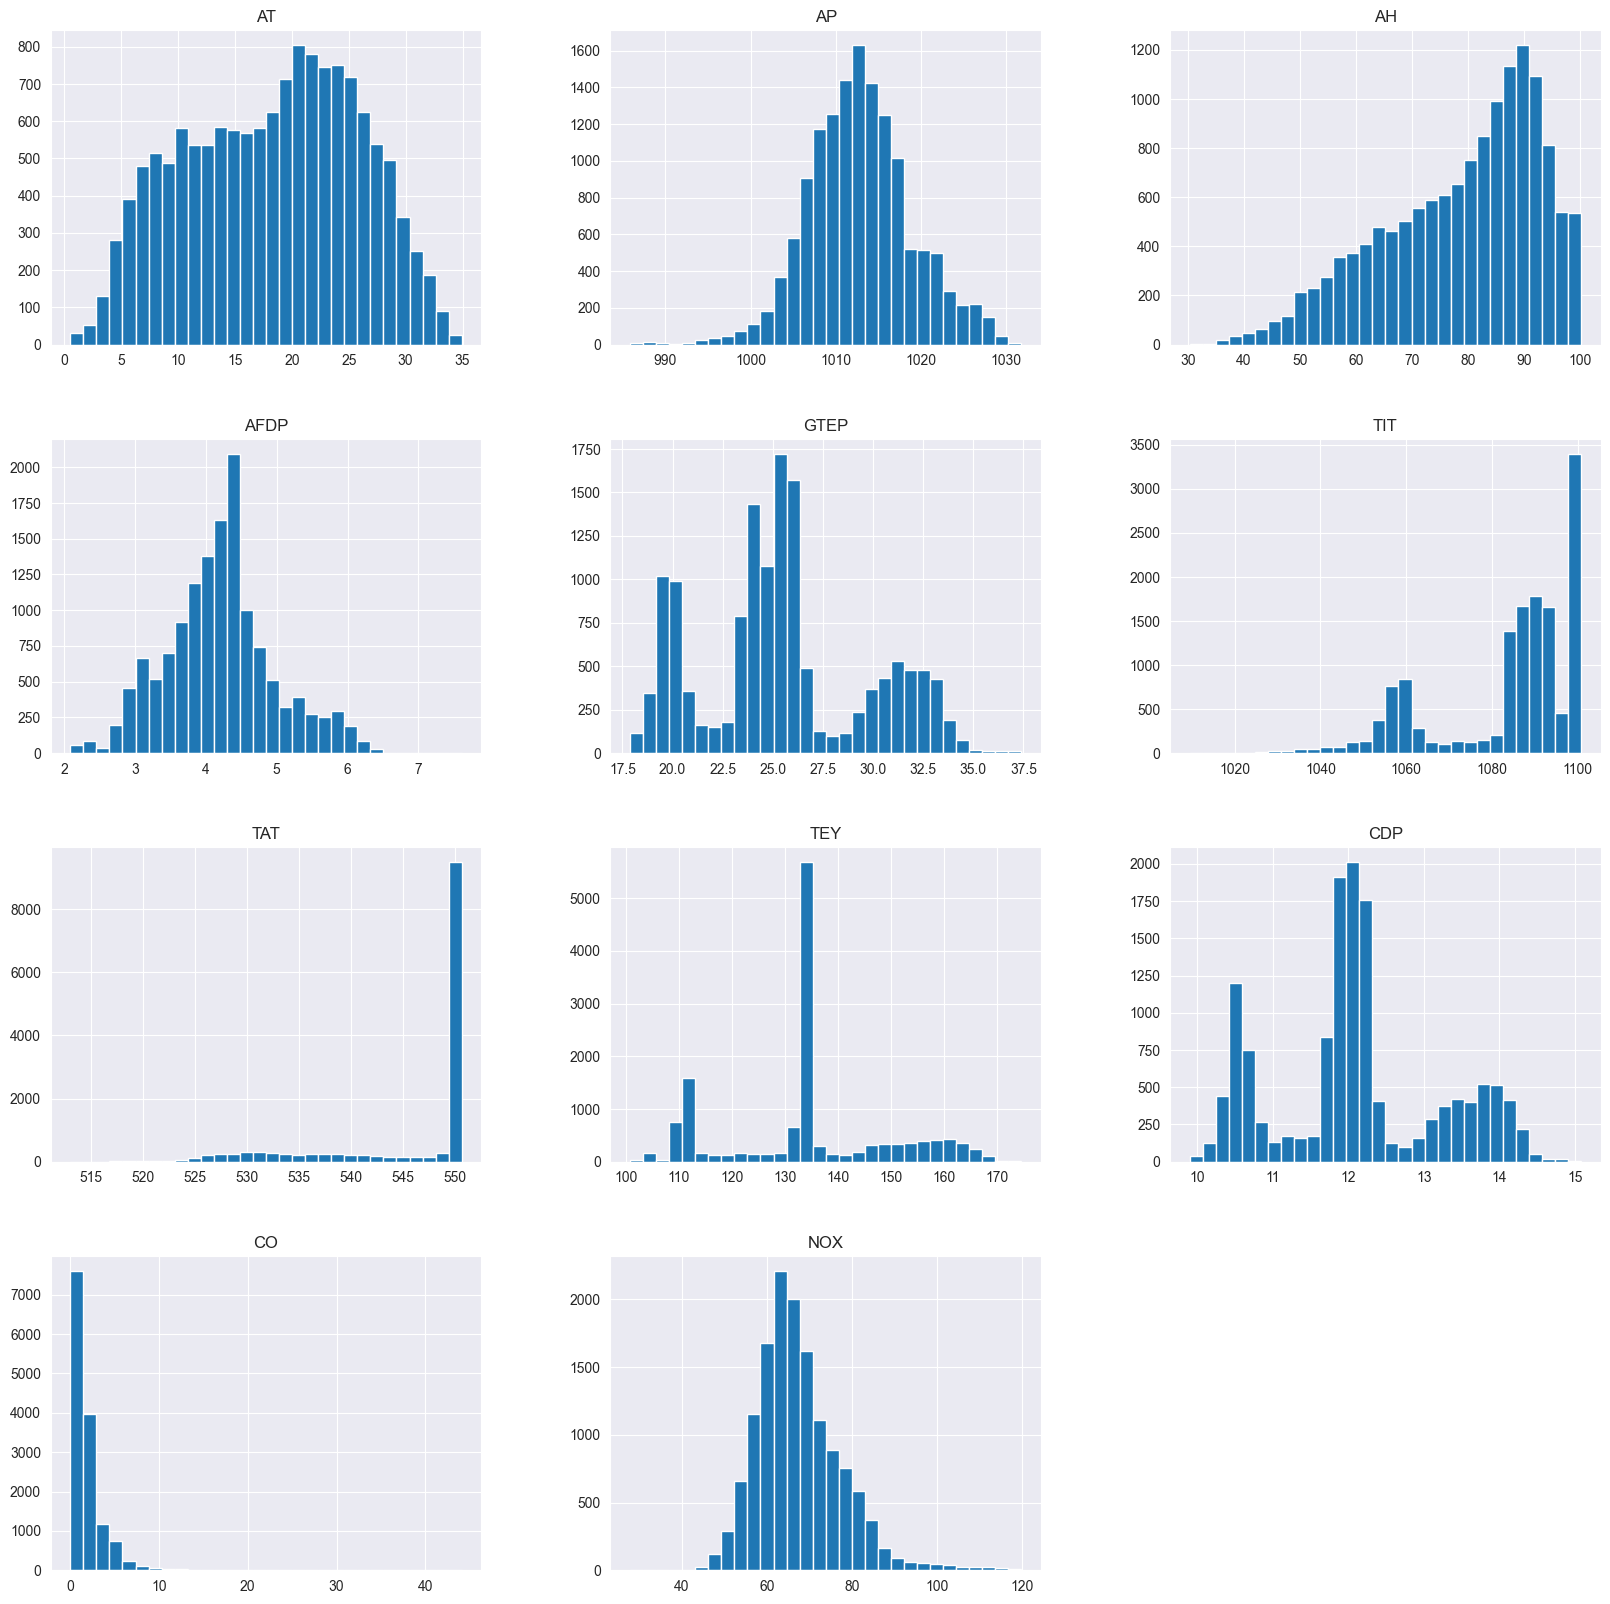

In [24]:
df.hist(bins = 30, figsize= (20, 20) )
plt.show()

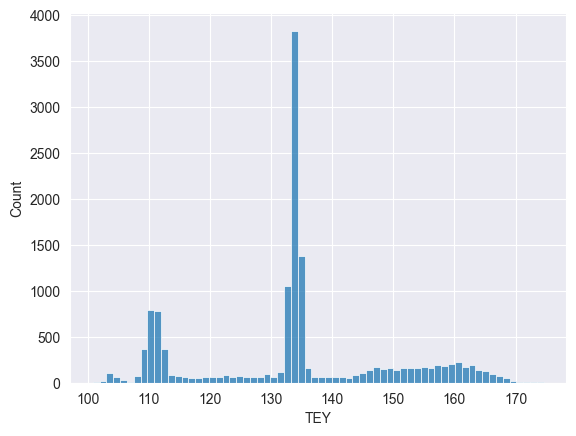

In [25]:
sns.histplot(df['TEY'])
plt.show()

In [26]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)#compute the q-th percentile of the data along the specified axis.

#Returns the q-th percentile(s) of the array elements.

        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[numerical_features])))) 

The dataset contains 965 observations with more than 2 outliers


In [27]:
# there are many outliers in the data

In [28]:
numerical_features

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

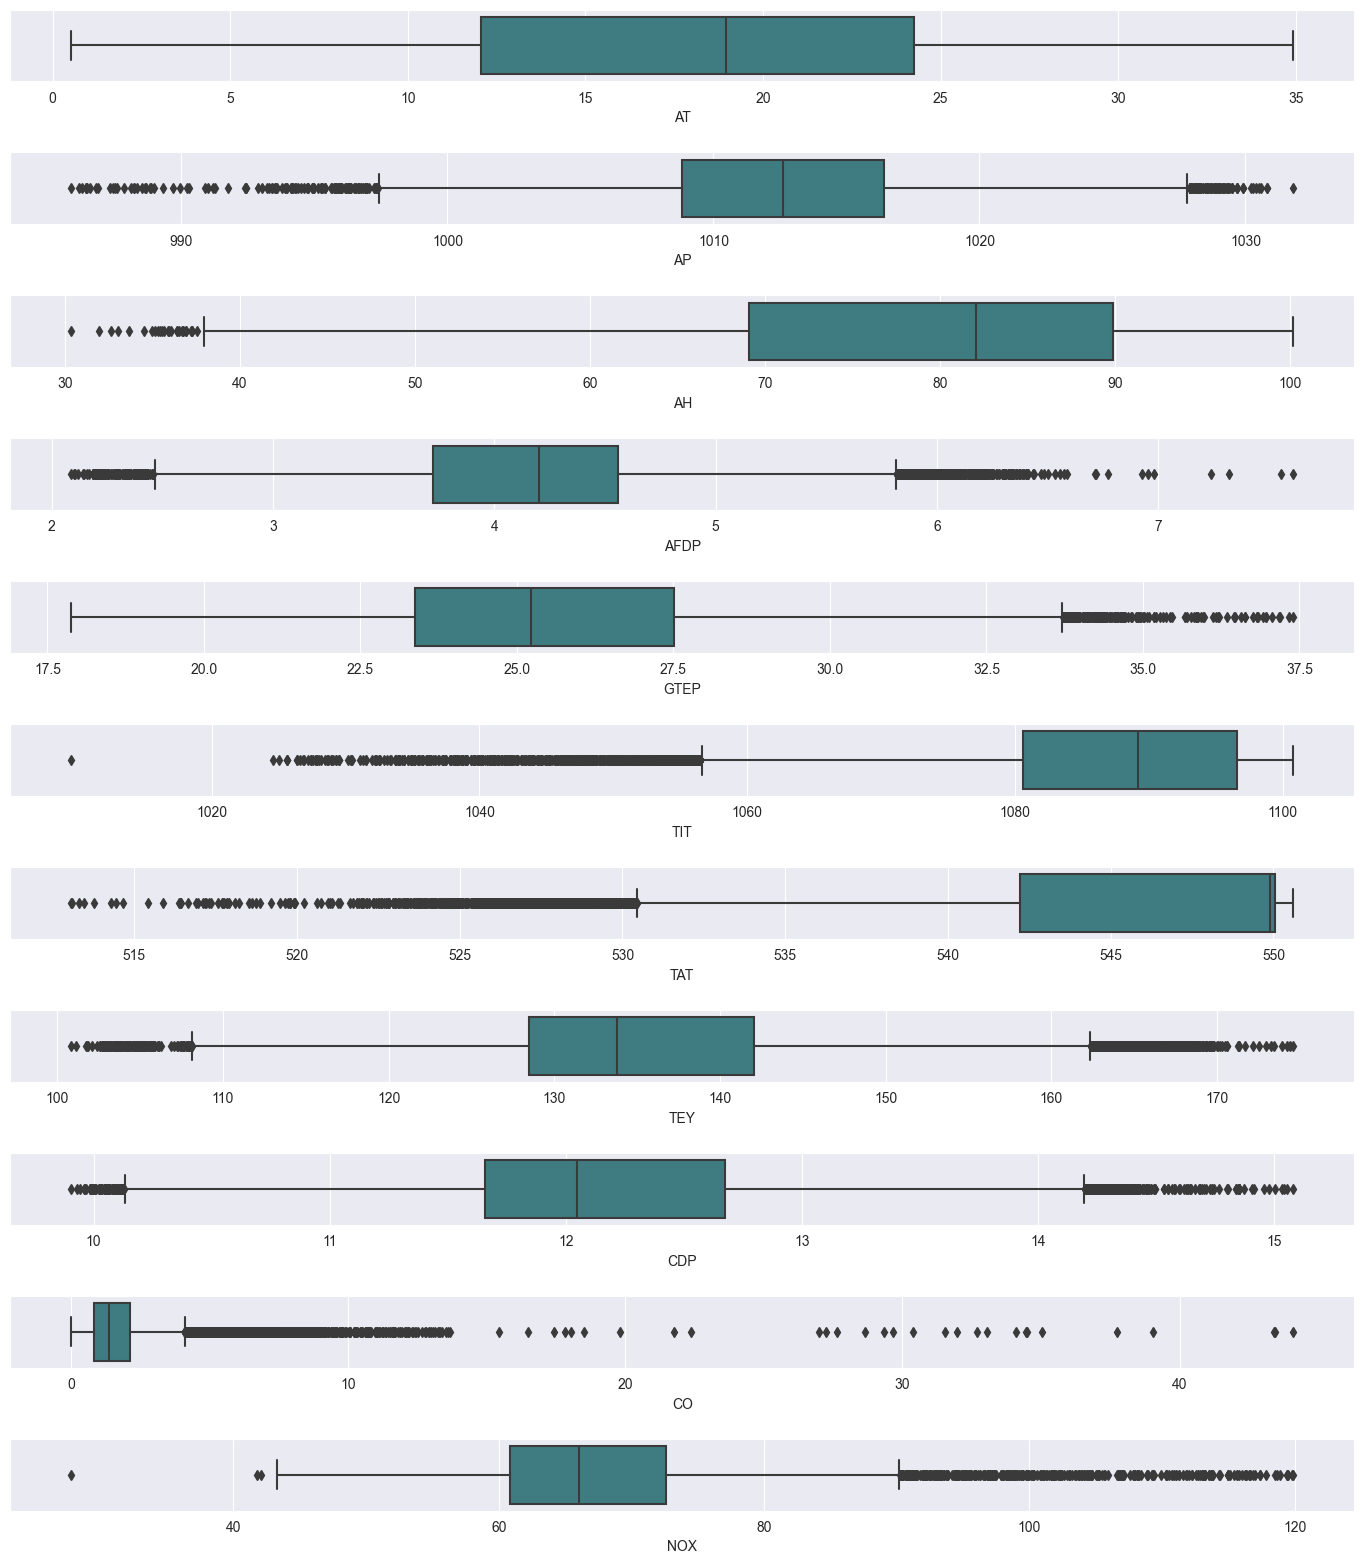

In [29]:
ot=df.copy() 
fig, axes=plt.subplots(11,1,figsize=(14,16),sharex=False,sharey=False)
sns.boxplot(x='AT',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data=ot,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

<AxesSubplot:>

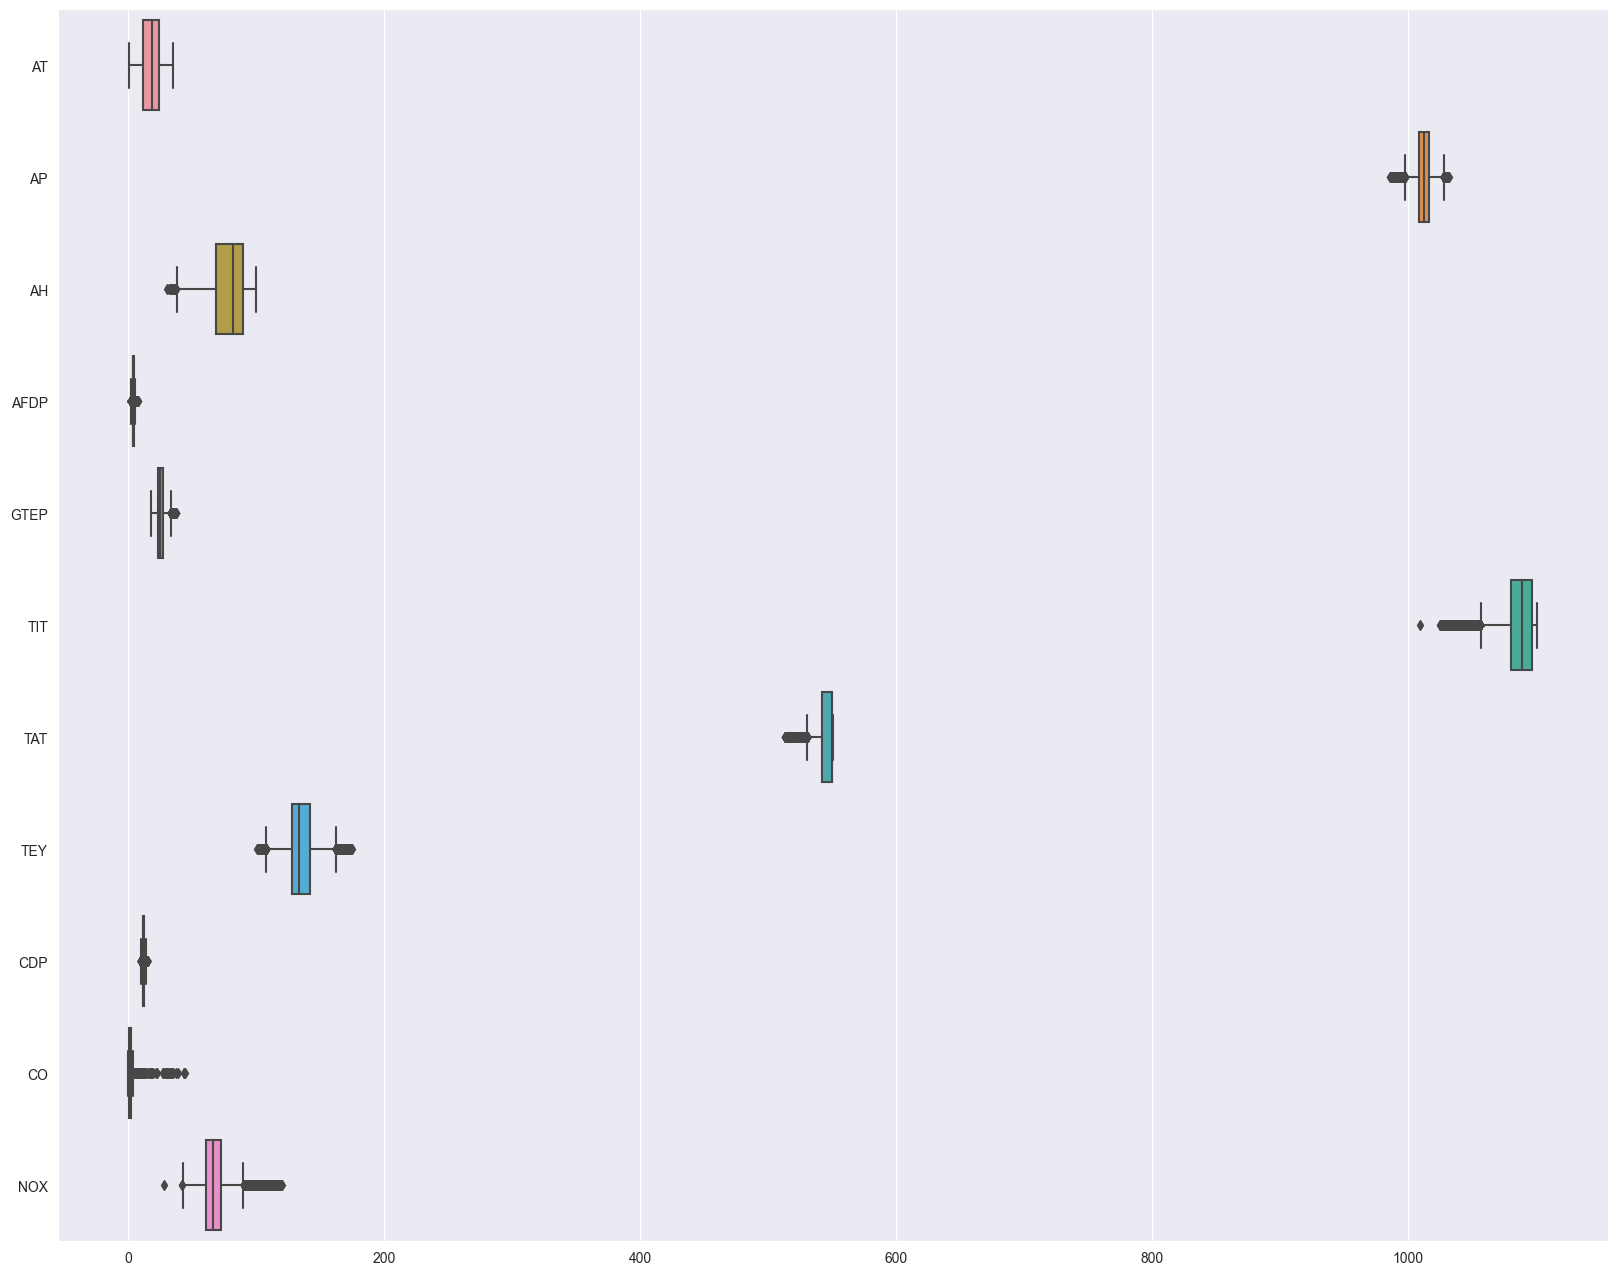

In [30]:
#outlier
plt.figure(figsize=(20,16))
sns.boxplot(data=df[numerical_features], orient="h")

Text(0.5, 1.0, 'Histogram of the Target Column')

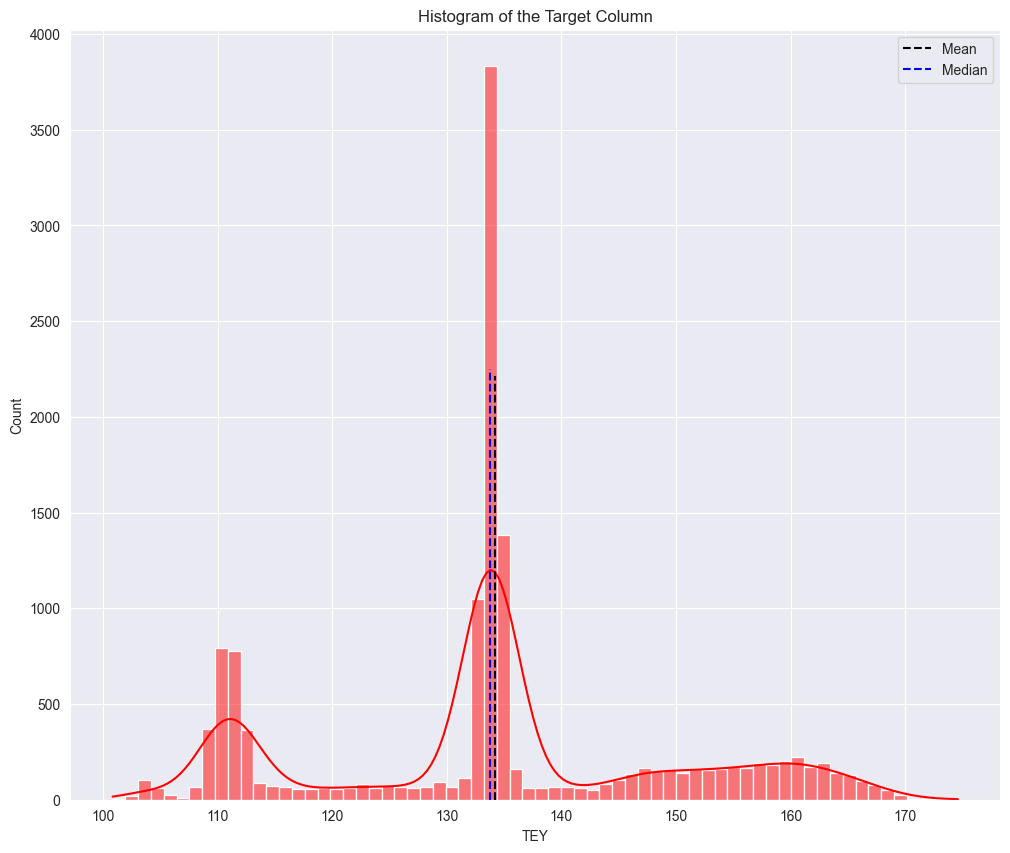

In [31]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
sns.histplot(data=df,x="TEY",color="red",kde=True)
plt.axvline(x=df["TEY"].mean(),ymax=0.55,color="black",linestyle='--',label="Mean")
plt.axvline(x=df["TEY"].median(),ymax=0.56,color="blue",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")

Text(0.5, 1.0, 'Cumulative of the Target Column')

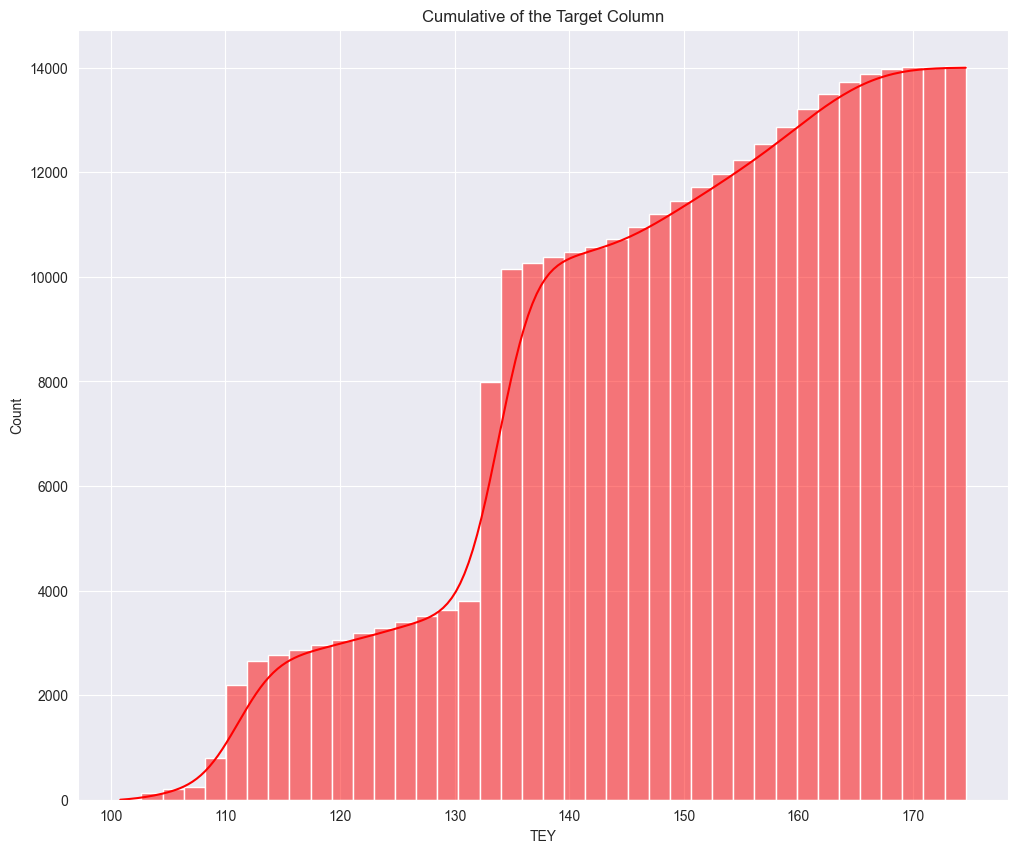

In [32]:
plt.figure(figsize = (12,10))
sns.histplot(df["TEY"],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative of the Target Column")

In [33]:
# most features are not on the same scale

In [34]:
# multivariate analysis

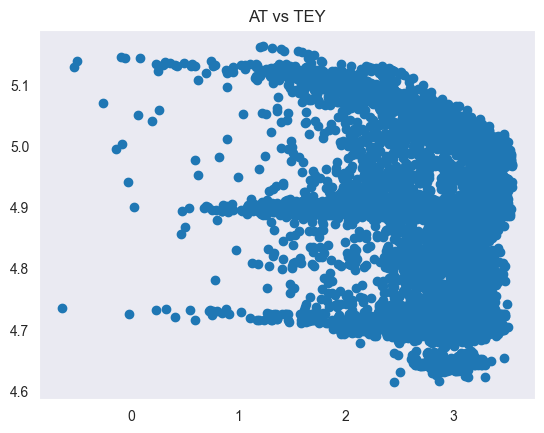

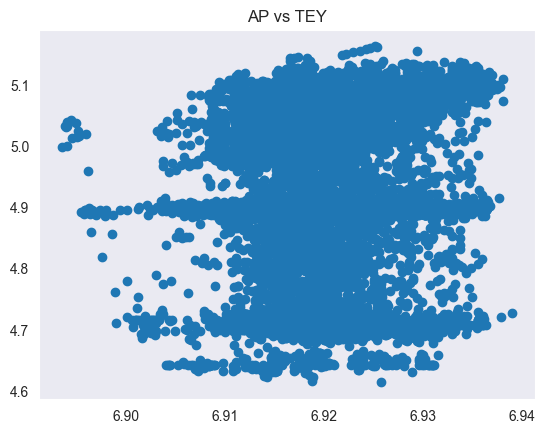

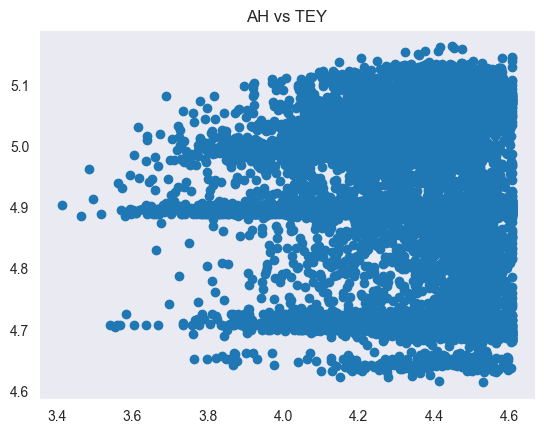

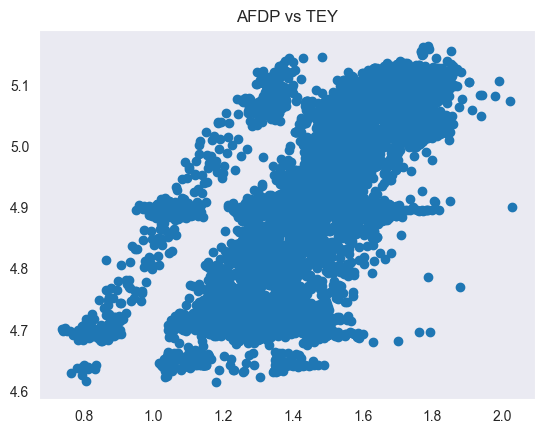

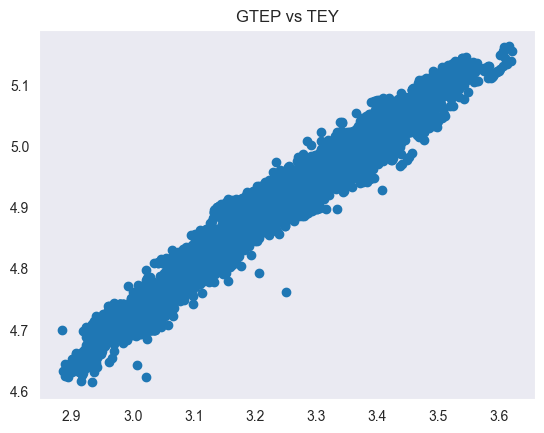

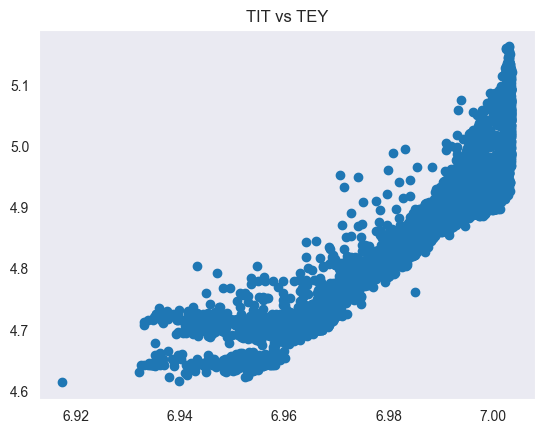

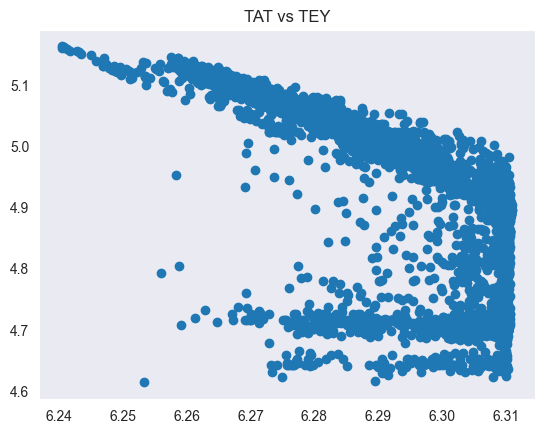

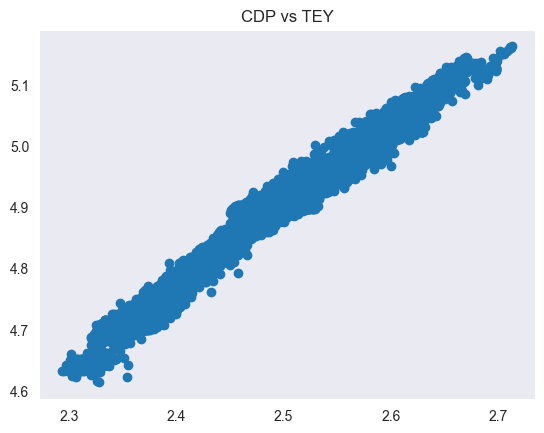

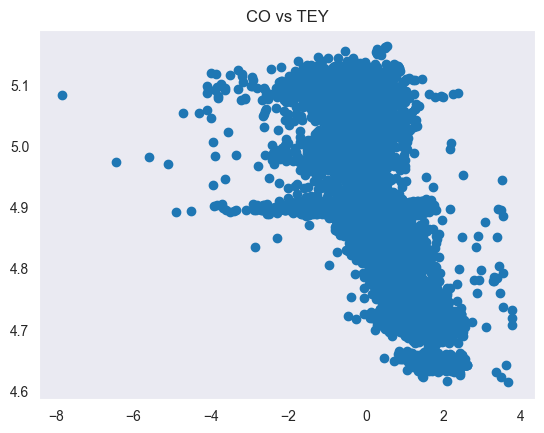

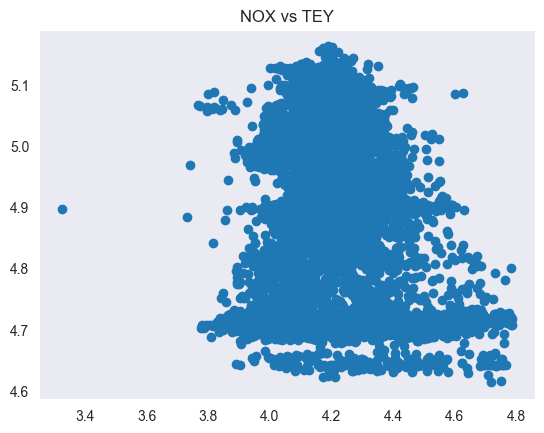

In [35]:
# pairplot
for i in df.columns:
    if i!="TEY": 
        plt.scatter(np.log(df[i]), np.log(df['TEY']))
        plt.title(i+ ' vs TEY')
        plt.grid()
        plt.show()

In [36]:
import matplotlib.pyplot as plt

<AxesSubplot:>

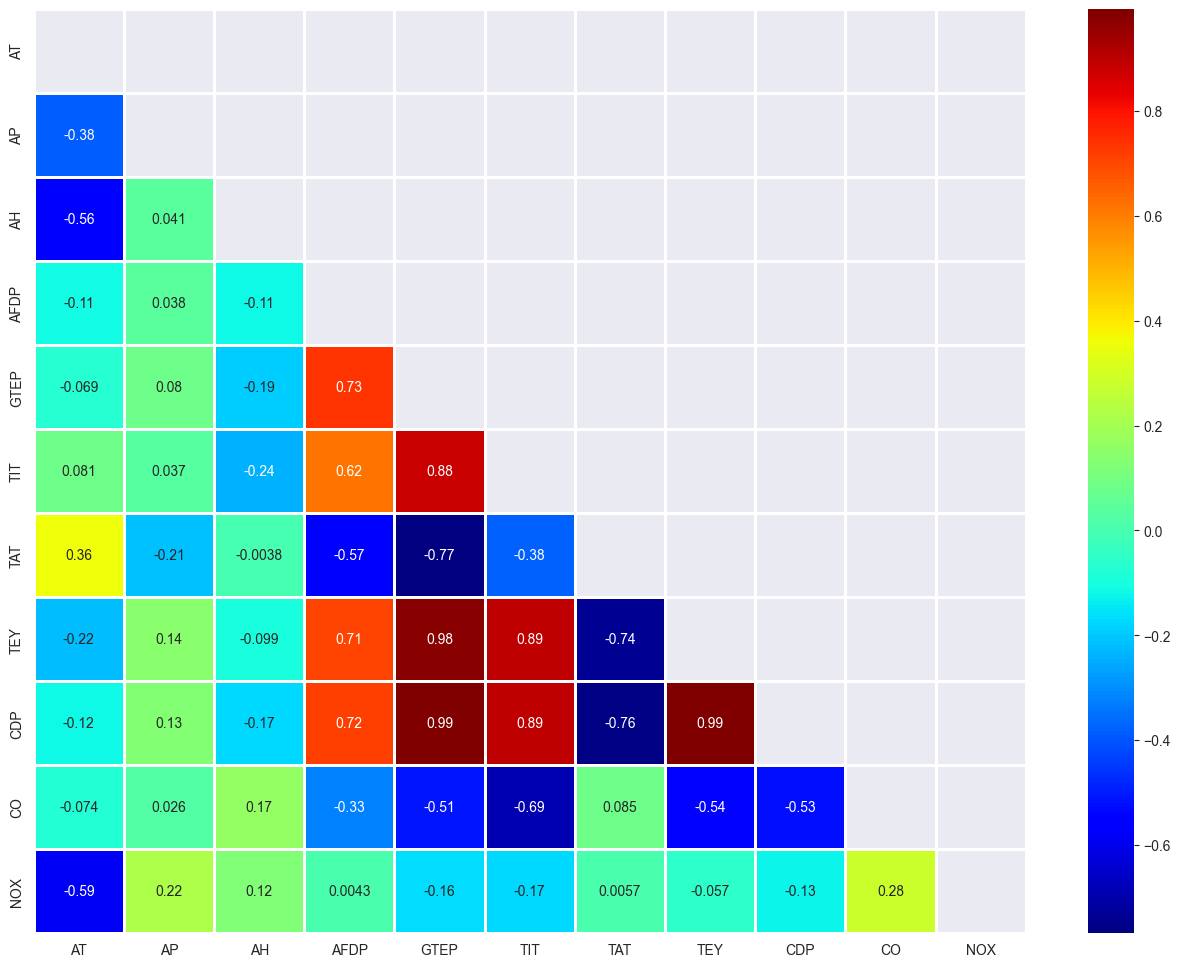

In [37]:
# Having a look at the correlation matrix

plt.figure(figsize=(16,12))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

Text(0.5, 1.0, 'Correlation with Turbine energy yield \n')

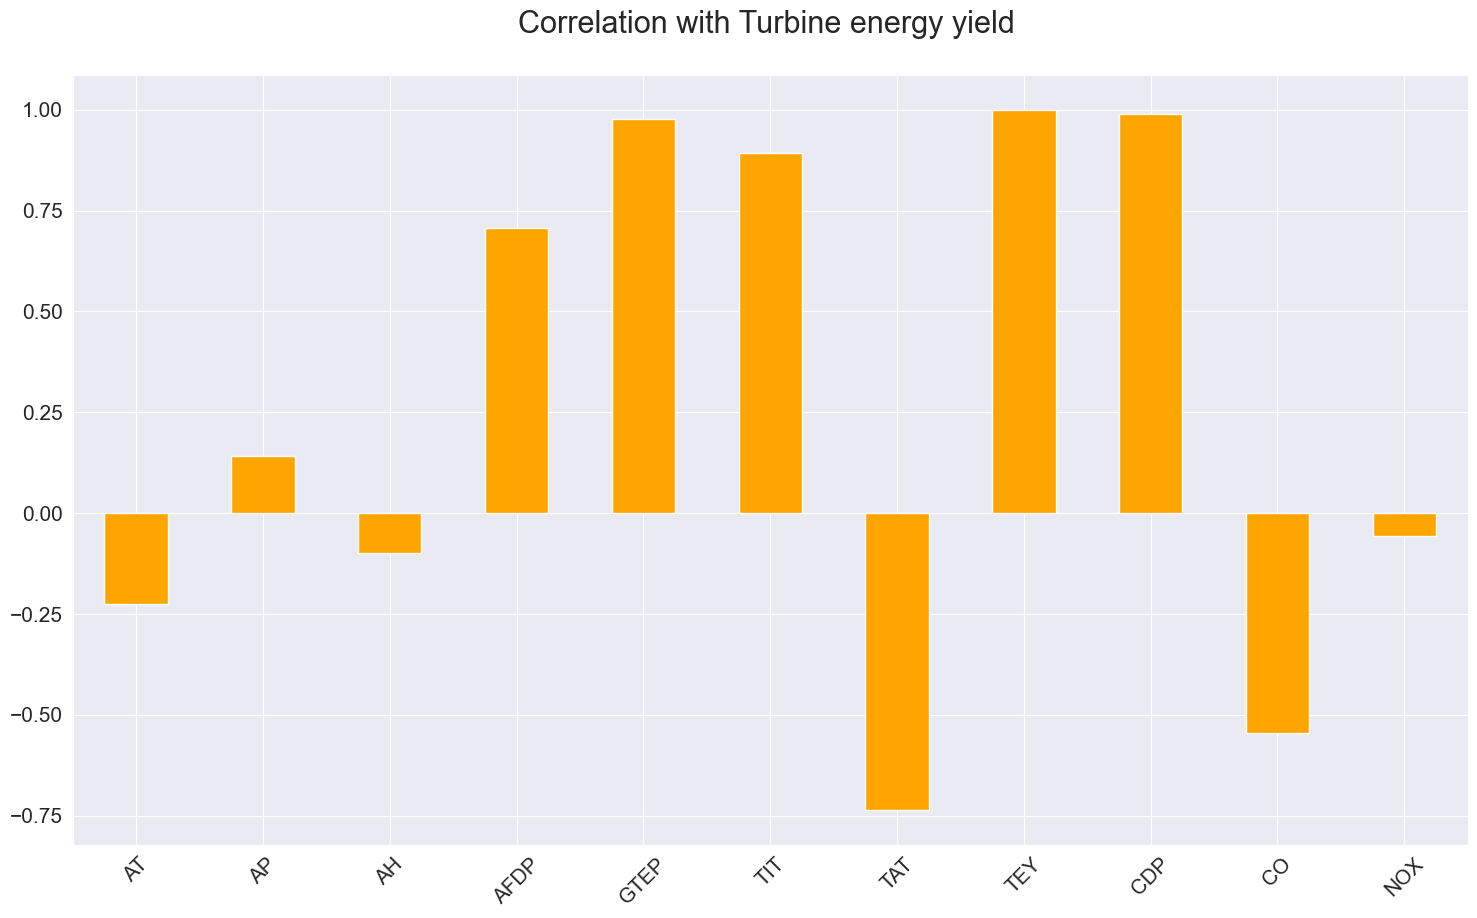

In [38]:
data2 = df.copy()

correlations = data2.corrwith(df.TEY)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Turbine energy yield \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

# Feature selection

In [39]:
#Feature importance
from numpy import set_printoptions

In [40]:
x = df.drop('TEY', axis=1)
y = df[["TEY"]]

In [41]:
# feature extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)

score_funccallable, default=f_classif
Function taking two arrays X and y, and returning a pair of arrays (scores, pvalues) 
or a single array with scores. Default is f_classif


f_classif
ANOVA F-value between label/feature for classification tasks.

mutual_info_classif
Mutual information for a discrete target.

chi2
Chi-squared stats of non-negative features for classification tasks.

f_regression
F-value between label/feature for regression tasks.

mutual_info_regression
Mutual information for a continuous target.

SelectPercentile
Select features based on percentile of the highest scores.

SelectFpr
Select features based on a false positive rate test.

SelectFdr
Select features based on an estimated false discovery rate.

SelectFwe
Select features based on family-wise error rate.

GenericUnivariateSelect
Univariate feature selector with configurable mode.

In [42]:
# summarize scores
scores = fit.scores_

features = fit.transform(x)

In [43]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

Score Feature
7  1.718410     CDP
4  1.615474    GTEP
5  1.337169     TIT
6  0.909507     TAT
3  0.654695    AFDP
8  0.498115      CO
0  0.433747      AT
9  0.292294     NOX
1  0.142436      AP
2  0.104591      AH

In [44]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df
# x = df.drop('TEY', axis=1) , so x.columns give the name of columns
#pd.DataFrame(data,columns=())

Score Feature
7  1.718410     CDP
4  1.615474    GTEP
5  1.337169     TIT
6  0.909507     TAT
3  0.654695    AFDP
8  0.498115      CO
0  0.433747      AT
9  0.292294     NOX
1  0.142436      AP
2  0.104591      AH

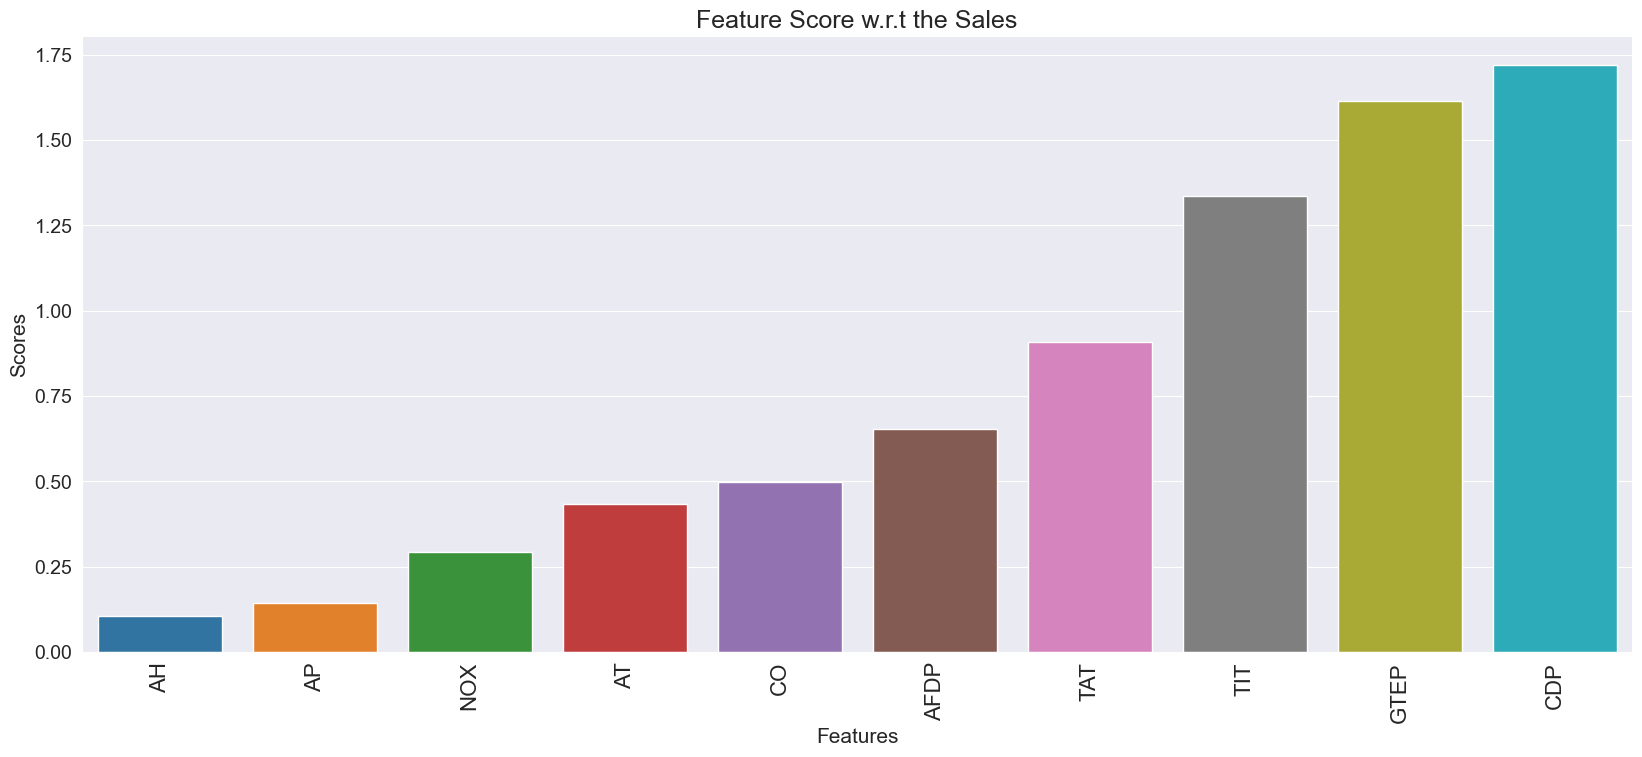

In [45]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [46]:
score_df.sort_values('Score',ascending=False)

Score Feature
7  1.718410     CDP
4  1.615474    GTEP
5  1.337169     TIT
6  0.909507     TAT
3  0.654695    AFDP
8  0.498115      CO
0  0.433747      AT
9  0.292294     NOX
1  0.142436      AP
2  0.104591      AH

In [47]:
model_data = df[['AP', 'NOX','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

AP     NOX     TIT     TAT    AFDP      CO      AT     TEY
0  1007.9  82.722  1059.2  550.00  3.5000  3.1547  6.8594  114.70
1  1008.4  82.776  1059.3  550.00  3.4998  3.2363  6.7850  114.72
2  1008.8  82.468  1059.4  549.87  3.4824  3.2012  6.8977  114.71
3  1009.2  82.670  1059.6  549.99  3.4805  3.1923  7.0569  114.72
4  1009.7  82.311  1059.7  549.98  3.4976  3.2484  7.3978  114.72

# target and features

In [48]:
X = model_data.iloc[:,0:7]
y = model_data.iloc[:,7]

# standard scaler

In [49]:
# Standardization
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [50]:
X_standardized

array([[-0.79998988,  1.51145145, -1.52470587, ..., -0.91319716,
         0.57119435, -1.50319249],
       [-0.71859052,  1.5168099 , -1.51858772, ..., -0.91345633,
         0.60921661, -1.51302282],
       [-0.65347104,  1.48624691, -1.51246957, ..., -0.93600423,
         0.59286145, -1.49813199],
       ...,
       [ 2.06526738,  0.82924195, -0.22765809, ..., -0.57044321,
         0.20159565, -0.31726438],
       [ 2.06526738,  1.28183214,  0.75736405, ..., -0.12933379,
        -0.4018213 , -0.46934371],
       [ 2.08154725,  0.87260567,  0.20061241, ..., -0.44383807,
        -0.30671906, -0.62551901]])

In [51]:
y.shape

(14024,)

In [52]:
# Model building

In [53]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam_v2

In [54]:
from keras.optimizers import SGD

In [55]:
# create model
model = Sequential()
model.add(Dense(units=12, input_dim=7,  activation='relu')) #1st layer
model.add(Dense(7, input_dim=12, activation='relu')) #2nd layer
model.add(Dense(1, activation='linear')) #3rd layer or op layer

In [56]:
 # output layer of neural network contain
    # for regression model(continuous data) , output layer may contain linear function, 
# sigmoid for binary classification 
# softmax for multi classification 

In [57]:
# Compile model
opt=SGD(lr=0.01,momentum=0.9)
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])

In [58]:
# optimizer for regression model will be mean squaresd error or mse logarithmic etc
# binary crossentropy for binary classification

In [59]:
# Fit the model
history = model.fit(X_standardized,y, validation_split=0.30, epochs=100, batch_size=50)

Epoch 1/100
197/197 [==============================] - 2s 5ms/step - loss: 0.8887 - mse: 2401.1741 - val_loss: 0.0253 - val_mse: 433.7762
Epoch 2/100
197/197 [==============================] - 1s 3ms/step - loss: 0.0156 - mse: 309.4868 - val_loss: 0.0173 - val_mse: 299.4054
Epoch 3/100
197/197 [==============================] - 1s 3ms/step - loss: 0.0107 - mse: 206.2582 - val_loss: 0.0138 - val_mse: 239.9343
Epoch 4/100
197/197 [==============================] - 1s 3ms/step - loss: 0.0085 - mse: 160.5117 - val_loss: 0.0116 - val_mse: 201.4586
Epoch 5/100
197/197 [==============================] - 1s 3ms/step - loss: 0.0071 - mse: 132.7929 - val_loss: 0.0100 - val_mse: 173.8913
Epoch 6/100
197/197 [==============================] - 1s 3ms/step - loss: 0.0061 - mse: 113.4180 - val_loss: 0.0086 - val_mse: 150.9821
Epoch 7/100
197/197 [==============================] - 1s 3ms/step - loss: 0.0053 - mse: 98.8346 - val_loss: 0.0074 - val_mse: 130.4003
Epoch 8/100
197/197 [====================

Epoch 60/100
197/197 [==============================] - 1s 3ms/step - loss: 2.3001e-04 - mse: 4.6574 - val_loss: 2.9208e-04 - val_mse: 5.2485
Epoch 61/100
197/197 [==============================] - 1s 3ms/step - loss: 2.2191e-04 - mse: 4.4872 - val_loss: 2.8492e-04 - val_mse: 5.1189
Epoch 62/100
197/197 [==============================] - 1s 3ms/step - loss: 2.1445e-04 - mse: 4.3272 - val_loss: 2.7574e-04 - val_mse: 4.9526
Epoch 63/100
197/197 [==============================] - 1s 3ms/step - loss: 2.0767e-04 - mse: 4.1759 - val_loss: 2.6547e-04 - val_mse: 4.7646
Epoch 64/100
197/197 [==============================] - 1s 3ms/step - loss: 2.0098e-04 - mse: 4.0279 - val_loss: 2.5989e-04 - val_mse: 4.6682
Epoch 65/100
197/197 [==============================] - 1s 3ms/step - loss: 1.9496e-04 - mse: 3.8985 - val_loss: 2.5346e-04 - val_mse: 4.5504
Epoch 66/100
197/197 [==============================] - 1s 3ms/step - loss: 1.8930e-04 - mse: 3.7743 - val_loss: 2.4738e-04 - val_mse: 4.4348
Epoch 

In [60]:
# evaluate the model
scores = model.evaluate(X_standardized, y)
scores

439/439 [==============================] - 1s 2ms/step - loss: 1.1131e-04 - mse: 2.0539


[0.00011131063365610316, 2.053880214691162]

In [61]:
# Visualize training history

# list all data in history
history.history.keys()


dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

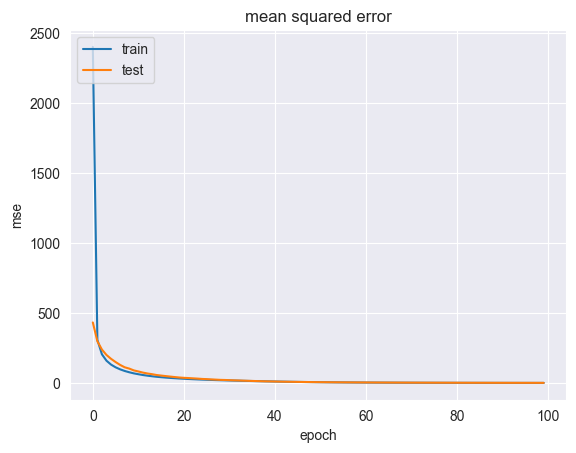

In [62]:
# summarize history for mse
import matplotlib.pyplot as plt
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('mean squared error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


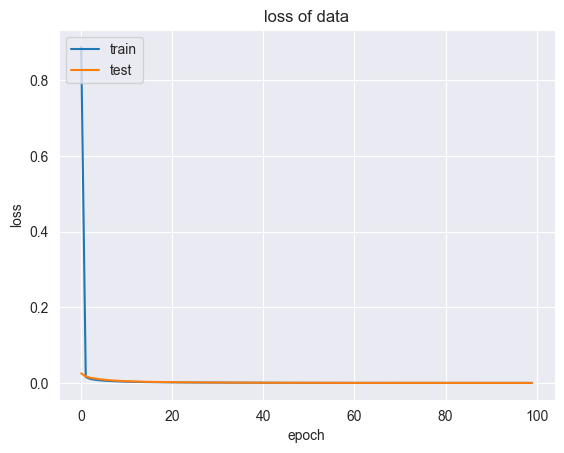

In [64]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss of data')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
